In [2]:
%config Completer.use_jedi = False

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**Slight preprocessing**

In [6]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [7]:
df.Churn = df.Churn.astype('int')

In [8]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Save states as a Series and drop for now from the DataFrame**

In [9]:
states = df.pop('State')

**Split the DataFrame into a matrix `X` and vector `y` which form a training set**

In [10]:
X, y = df.drop('Churn', axis=1), df.Churn

In [11]:
X.shape, y.shape

((3333, 18), (3333,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.3, random_state=17)

In [15]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
tree = DecisionTreeClassifier(random_state=17)

fit-predict

In [18]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [19]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 17,
 'splitter': 'best'}

Cross-validation

In [53]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [67]:
from tqdm.notebook import tqdm

In [44]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [58]:
val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
val_scores

array([0.91862955, 0.8993576 , 0.92077088, 0.91630901, 0.89699571])

In [59]:
val_scores.mean()

0.9104125502017257

In [71]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []
max_depth_values = np.arange(2, 11)

# for each value of max_depth
for curr_max_depth in tqdm(max_depth_values):
    tree = DecisionTreeClassifier(random_state=17, max_depth=curr_max_depth)
    
    # preform cross-validation
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    cv_accuracies_by_depth.append(val_scores.mean())
    
    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    curr_ho_pred = tree.predict(X_holdout)
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, curr_ho_pred))

  0%|          | 0/9 [00:00<?, ?it/s]

In [65]:
accuracies_by_depth

[0.8769848636626811,
 0.9018352923877181,
 0.9211292975893981,
 0.9335600261003023,
 0.9361296192480539,
 0.936563398921065,
 0.9382746229701041,
 0.9318432879028775,
 0.9288445102057695]

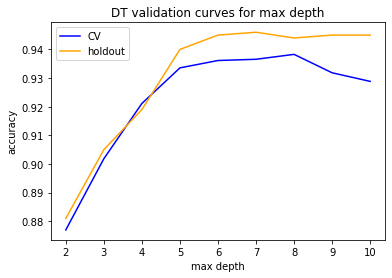

In [74]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DT validation curves for max depth');

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
pred_holdout = tree.predict(X_holdout)

In [24]:
pred_holdout.shape, y_holdout.shape

((1000,), (1000,))

In [26]:
accuracy_score(y_holdout, pred_holdout)

0.921

In [27]:
import numpy as np

In [30]:
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [33]:
from sklearn.model_selection import GridSearchCV

In [43]:
params = {'max_depth': np.arange(2, 11), 'min_samples_leaf': np.arange(1, 11)}

In [45]:
best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

In [46]:
best_tree.fit(X_train, y_train, )

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 419 out of 450 | elapsed:    4.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    4.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             verbose=1)

In [47]:
best_tree.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__presort': 'deprecated',
 'estimator__random_state': 17,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(random_state=17),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
  'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

In [48]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 4}

In [49]:
best_tree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 17,
 'splitter': 'best'}

**Cross-Validation assessment of model quality**

In [50]:
best_tree.best_score_

0.9438485079633493

**Holdout assessment**

In [51]:
pred_holdout_better = best_tree.predict(X_holdout)

In [52]:
accuracy_score(y_holdout, pred_holdout_better)

0.94

In [75]:
from sklearn.tree import export_graphviz

In [78]:
export_graphviz(decision_tree=best_tree.best_estimator_, out_file='tree.dot', filled=True, feature_names=X.columns)

In [81]:
tree = DecisionTreeClassifier(random_state=17, max_depth=3).fit(X_train, y_train)

In [84]:
from io import StringIO
import pydotplus
from ipywidgets import Image

In [90]:
dot_data = StringIO()
export_graphviz(decision_tree=tree, out_file=dot_data, filled=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xfd\x00\x00\x01\xf1\x08\x06\x00\x00\x00\x16Y\xc9…

In [91]:
from sklearn.tree import plot_tree

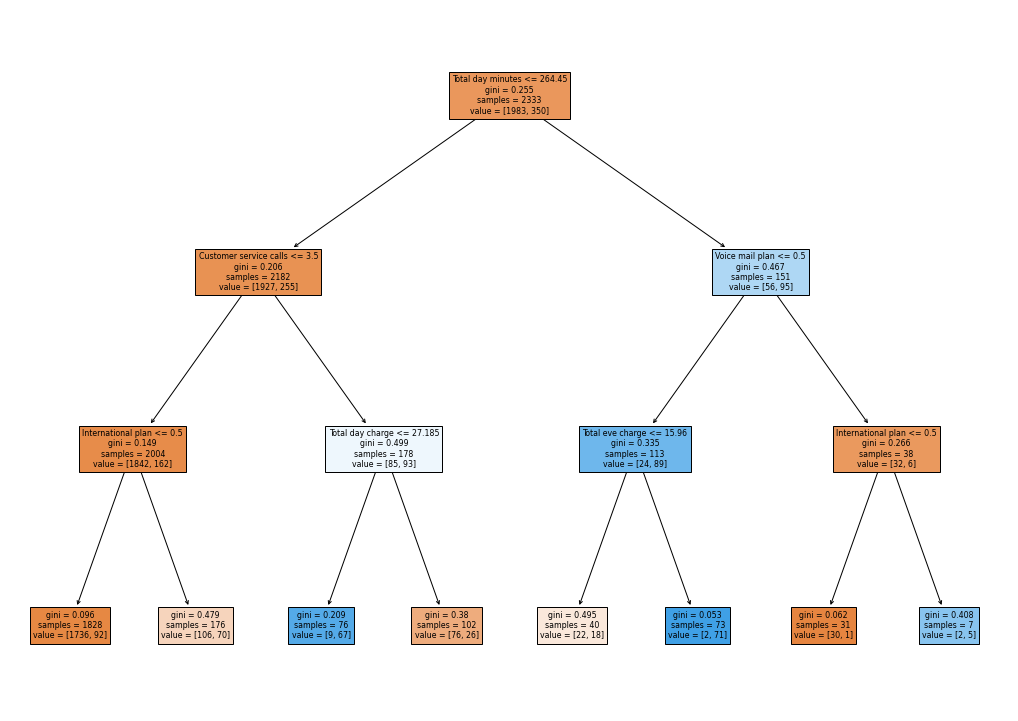

In [100]:
plt.figure(figsize=(18, 13))
plot_tree(tree, filled=True, feature_names=X.columns);